In [1]:
import pandas as pd
import numpy as np
from glob import iglob

In [2]:
import datetime

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

In [283]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [285]:
import matplotlib.dates as mdates

In [19]:
def load_all_data(data_dir = "parking_data/", filetype = "csv"):
    
    data = pd.DataFrame()
    
#     i = 0
    
    data_type = {'tag_number_masked': str, 'date_of_infraction': str, 'infraction_code': np.float64, 
                 'set_fine_amount': np.float64, 'time_of_infraction': str, 'location1': str, 
                 'location2': str, 'location3': str, 'location4': str, 'province': str}
    
    for path in iglob(f"{data_dir}*.{filetype}"):
        
        print(path)
        
        data = pd.concat([data, pd.read_csv(path, encoding = "ISO-8859-1", on_bad_lines = 'skip', 
                                            dtype = data_type)])
#         year = path.split("_")[4]
#         data = pd.read_csv(path, encoding = "ISO-8859-1", on_bad_lines='skip')
#         data["date_of_infraction"] = data["date_of_infraction"].astype(str).str.replace(".0", "")
#         values = data["date_of_infraction"].str.len().value_counts()
#         print(values)
#         print(data[data["date_of_infraction"].str.len() == 6]["date_of_infraction"])
#         print(data[data["date_of_infraction"].str.len() == 4]["date_of_infraction"])
#         print(data[data["date_of_infraction"].str.len() == 2]["date_of_infraction"])
        
#         i += 1
        
#         if (i == 2):
            
#             break
        
    return data


In [20]:
parking_df = load_all_data()

parking_data/Parking_Tags_Data_2019_9.csv
parking_data/Parking_Tags_Data_2019_8.csv
parking_data/Parking_Tags_Data_2012.csv
parking_data/Parking_Tags_Data_2015_2.csv
parking_data/Parking_Tags_Data_2015_3.csv
parking_data/Parking_Tags_Data_2022_8.csv
parking_data/Parking_Tags_Data_2017_1.csv
parking_data/Parking_Tags_Data_2013.csv
parking_data/Parking_Tags_Data_2011.csv
parking_data/Parking_Tags_Data_2017_3.csv
parking_data/Parking_Tags_Data_2015_1.csv
parking_data/Parking_Tags_Data_2017_2.csv
parking_data/Parking_Tags_Data_2010.csv
parking_data/Parking_Tags_Data_2021_12.csv
parking_data/Parking_Tags_Data_2021_13.csv
parking_data/Parking_Tags_Data_2016_4.csv
parking_data/Parking_Tags_Data_2014_4.csv
parking_data/Parking_Tags_Data_2021_11.csv
parking_data/Parking_Tags_Data_2021_10.csv
parking_data/Parking_Tags_Data_2021_8.csv
parking_data/Parking_Tags_Data_2014_1.csv
parking_data/Parking_Tags_Data_2016_3.csv
parking_data/Parking_Tags_Data_2021_14.csv
parking_data/Parking_Tags_Data_2021_1

In [21]:
parking_df.columns

Index(['tag_number_masked', 'date_of_infraction', 'infraction_code',
       'infraction_description', 'set_fine_amount', 'time_of_infraction',
       'location1', 'location2', 'location3', 'location4', 'province', 'ÿþt',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [22]:
# drop empty columns
parking_df = parking_df.drop(columns = ["ÿþt", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3", 
                                        "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", 
                                        "Unnamed: 8", "Unnamed: 9", "Unnamed: 10"])

In [8]:
# reset df index after removing empty columns

parking_df = parking_df.reset_index()

In [23]:
parking_df.dtypes

tag_number_masked          object
date_of_infraction         object
infraction_code           float64
infraction_description     object
set_fine_amount           float64
time_of_infraction         object
location1                  object
location2                  object
location3                  object
location4                  object
province                   object
dtype: object

In [24]:
parking_df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***51471,20191124,207.0,PARK MACHINE-REQD FEE NOT PAID,30.0,2011,NR,548 DANFORTH AVE,NaN,NaN,ON
1,***61170,20191124,207.0,PARK MACHINE-REQD FEE NOT PAID,30.0,2011,NR,510 COLLEGE ST,NaN,NaN,ON
2,***92224,20191124,207.0,PARK MACHINE-REQD FEE NOT PAID,30.0,2011,NR,541 MOUNT PLEASANT RD,NaN,NaN,ON
3,***76780,20191124,29.0,PARK PROHIBITED TIME NO PERMIT,30.0,2012,E/S,PRINCESS ST,S/O,FRONT ST E,ON
4,***39600,20191124,2.0,PARK - LONGER THAN 3 HOURS,30.0,2012,NR,32 FIELDWOOD DR,NaN,NaN,ON


In [12]:

# learn how many values have length 6, length 8 or less and see how many I would have to remove

/var/folders/sc/c663j6bx65391kdjgk7jy_d00000gn/T/ipykernel_14729/554310698.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  parking_df["date_of_infraction"] = parking_df["date_of_infraction"].astype(str).str.replace(".0", "")


In [25]:
parking_df["date_of_infraction"].str.len().value_counts()

8.0    28765133
Name: date_of_infraction, dtype: int64

In [26]:
parking_df["time_of_infraction"].str.len().value_counts()

4.0    28745326
Name: time_of_infraction, dtype: int64

In [55]:
parking_df["set_fine_amount"].value_counts()

30.0     15334624
40.0      4916056
60.0      2639970
50.0      2279417
15.0      1209742
100.0     1019636
150.0      804690
250.0      225281
450.0      174091
75.0       102548
105.0       31810
90.0        13795
300.0        8814
0.0          2691
55.0         1872
200.0          82
175.0           9
500.0           3
20.0            2
Name: set_fine_amount, dtype: int64

In [27]:
# concatenate columns "date_of_infraction" and "time_of_infraction" into a new column "datetime_infraction" 
# and then convert the resulting column into datetime type %Y%m%d%H%M

parking_df["datetime_of_infraction"] = parking_df["date_of_infraction"] + parking_df["time_of_infraction"]


In [208]:
parking_df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction,date_of_infraction_dt,time_of_infraction_dt,year_of_infraction,month_of_infraction,day_of_infraction,dayofweek_infraction,day_name_infraction
0,***51471,20191124,207.0,PARK MACHINE-REQD FEE NOT PAID,30.0,2011,NR,548 DANFORTH AVE,NaN,NaN,ON,201911242011,2019-11-24,1900-01-01 20:11:00,2019.0,11.0,24.0,6.0,Sunday
1,***61170,20191124,207.0,PARK MACHINE-REQD FEE NOT PAID,30.0,2011,NR,510 COLLEGE ST,NaN,NaN,ON,201911242011,2019-11-24,1900-01-01 20:11:00,2019.0,11.0,24.0,6.0,Sunday
2,***92224,20191124,207.0,PARK MACHINE-REQD FEE NOT PAID,30.0,2011,NR,541 MOUNT PLEASANT RD,NaN,NaN,ON,201911242011,2019-11-24,1900-01-01 20:11:00,2019.0,11.0,24.0,6.0,Sunday
3,***76780,20191124,29.0,PARK PROHIBITED TIME NO PERMIT,30.0,2012,E/S,PRINCESS ST,S/O,FRONT ST E,ON,201911242012,2019-11-24,1900-01-01 20:12:00,2019.0,11.0,24.0,6.0,Sunday
4,***39600,20191124,2.0,PARK - LONGER THAN 3 HOURS,30.0,2012,NR,32 FIELDWOOD DR,NaN,NaN,ON,201911242012,2019-11-24,1900-01-01 20:12:00,2019.0,11.0,24.0,6.0,Sunday


In [72]:
parking_df.shape

(40022011, 18)

In [73]:
# save parking data to csv
parking_df.to_csv("parking.csv", index = False)

/usr/local/lib/python3.9/site-packages/pandas/core/internals/blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [34]:
sum(parking_df["datetime_of_infraction"].isna())

11276685

In [37]:
parking_df["date_of_infraction_dt"] = pd.to_datetime(parking_df["date_of_infraction"], format = "%Y%m%d")

In [40]:
parking_df["time_of_infraction_dt"] = pd.to_datetime(parking_df["time_of_infraction"], format = "%H%M", 
                                                     errors = "coerce")

In [47]:
parking_df["year_of_infraction"] = parking_df["date_of_infraction_dt"].dt.year

In [48]:
parking_df["month_of_infraction"] = parking_df["date_of_infraction_dt"].dt.month

In [50]:
parking_df["day_of_infraction"] = parking_df["date_of_infraction_dt"].dt.day

In [53]:
parking_df["dayofweek_infraction"] = parking_df["date_of_infraction_dt"].dt.dayofweek

In [207]:
parking_df["day_name_infraction"] = parking_df["date_of_infraction_dt"].dt.day_name()

In [ ]:
# month and day of month (count and total revenue)
# day of week and hour
# daily count over time 

In [67]:
# frequency of infractions every day of the month for the 12 months of the year over all years combined 

data_month_day_count = parking_df.groupby(["month_of_infraction", "day_of_infraction"]).agg("count").reset_index().pivot(index = "day_of_infraction", 
                                                                                                                                columns = "month_of_infraction", 
                                                                                                                                values = "infraction_code")
data_month_day_count

month_of_infraction,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
day_of_infraction,,,,,,,,,,,,
1.0,17789.0,72373.0,83331.0,80717.0,86228.0,85825.0,39572.0,79179.0,86175.0,97095.0,94841.0,82200.0
2.0,64614.0,59797.0,81701.0,77239.0,80691.0,78029.0,72184.0,78277.0,72587.0,85666.0,87223.0,83962.0
3.0,65616.0,67808.0,82348.0,73753.0,79493.0,79255.0,73286.0,71255.0,75618.0,87108.0,86273.0,85989.0
4.0,76661.0,70429.0,88182.0,82823.0,81368.0,79289.0,81822.0,74531.0,77729.0,85984.0,87762.0,83011.0
5.0,73558.0,63669.0,87535.0,82178.0,78415.0,79753.0,80867.0,74341.0,72349.0,87202.0,89197.0,90020.0
6.0,73926.0,64096.0,85399.0,72444.0,79757.0,83730.0,82446.0,75554.0,79720.0,83675.0,85933.0,88272.0
7.0,72161.0,63971.0,89546.0,78639.0,79626.0,78425.0,82271.0,73358.0,73471.0,82257.0,89423.0,87351.0
8.0,72573.0,63980.0,87916.0,79186.0,80658.0,82444.0,80378.0,80031.0,82143.0,73882.0,87191.0,84767.0
9.0,78524.0,60682.0,87855.0,77332.0,82597.0,80502.0,80618.0,80179.0,86071.0,78064.0,87201.0,82292.0


Text(0.5, 1.0, 'Daily frequency of infractions in a year for all years combined')

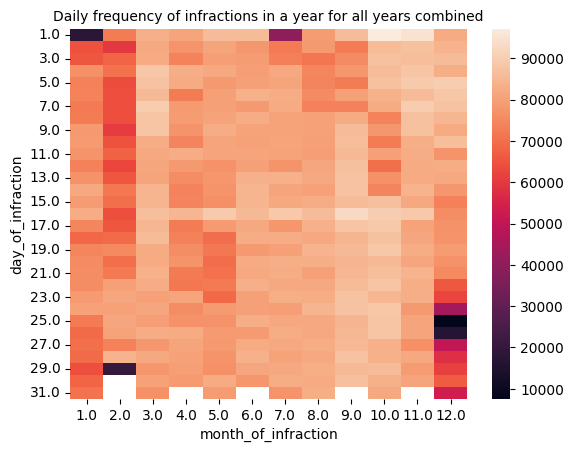

In [81]:
ax = sns.heatmap(data_month_day_count)
ax.set_title("Daily frequency of infractions in a year for all years combined", fontsize = 10)

In [ ]:
# total revenue of infractions every day of the month for the 12 months of the year over all years combined

In [75]:
data_month_day_revenue = parking_df.groupby(["month_of_infraction", "day_of_infraction"]).agg({"set_fine_amount": lambda x: np.sum(x)}).reset_index().pivot(index = "day_of_infraction", 
                                                                                                                                columns = "month_of_infraction", 
                                                                                                                                values = "set_fine_amount")
data_month_day_revenue

month_of_infraction,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
day_of_infraction,,,,,,,,,,,,
1.0,910805.0,3295835.0,3777725.0,3734640.0,3862080.0,3972785.0,2077210.0,3697055.0,3968495.0,4404650.0,4412335.0,3758925.0
2.0,2975705.0,2764155.0,3821210.0,3400855.0,3646175.0,3587230.0,3331130.0,3653920.0,3386240.0,3873395.0,4033165.0,3823370.0
3.0,3007665.0,3175305.0,3801745.0,3376910.0,3664675.0,3642830.0,3377375.0,3351110.0,3477310.0,3950320.0,3948385.0,3872850.0
4.0,3453275.0,3223765.0,4060415.0,3812040.0,3684645.0,3609790.0,3845100.0,3532395.0,3580745.0,3891350.0,4050575.0,3796855.0
5.0,3347360.0,2990470.0,3962175.0,3718130.0,3612385.0,3614020.0,3770545.0,3533095.0,3331810.0,3938345.0,4043210.0,4091460.0
6.0,3392500.0,2958850.0,3873295.0,3407305.0,3634455.0,3776955.0,3799055.0,3522575.0,3709705.0,3745515.0,3899100.0,3980350.0
7.0,3312215.0,2908825.0,3992080.0,3656015.0,3581000.0,3575480.0,3860025.0,3423895.0,3434640.0,3751940.0,4035355.0,3996835.0
8.0,3340170.0,2951875.0,3995985.0,3679865.0,3665545.0,3693170.0,3737350.0,3704735.0,3774000.0,3327405.0,3955145.0,3839510.0
9.0,3581450.0,2834085.0,4025820.0,3543220.0,3751135.0,3659380.0,3678295.0,3730120.0,3976055.0,3519525.0,3962810.0,3791905.0


Text(0.5, 1.0, 'Total daily revenue in a year for all years combined')

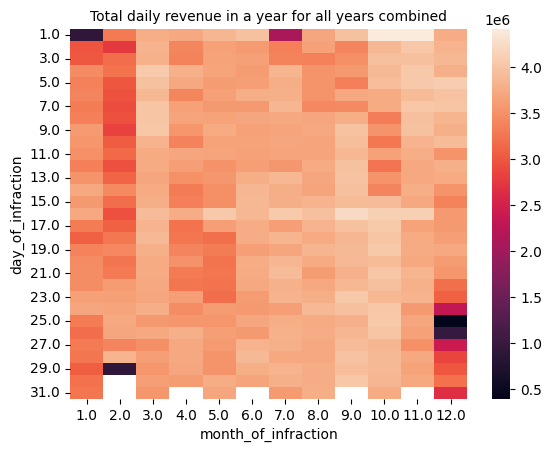

In [80]:
ax = sns.heatmap(data_month_day_revenue)
ax.set_title("Total daily revenue in a year for all years combined", fontsize = 10)

In [158]:
# daily revenue in 2019, 2020, 2021

# daily_rev_2019 = parking_df[parking_df["year_of_infraction"] == 2019]
# daily_rev_2019 = daily_rev_2019.groupby(["month_of_infraction", "day_of_infraction"])["set_fine_amount"].agg("sum").reset_index().pivot(index = "day_of_infraction", 
#                                                                                                                                 columns = "month_of_infraction", values = "set_fine_amount")
# daily_rev_2020 = parking_df[parking_df["year_of_infraction"] == 2020]
# daily_rev_2020 = daily_rev_2020.groupby(["month_of_infraction", "day_of_infraction"])["set_fine_amount"].agg("sum").reset_index().pivot(index = "day_of_infraction", columns = "month_of_infraction", values = "set_fine_amount")

daily_rev_2021 = parking_df[parking_df["year_of_infraction"] == 2021]
daily_rev_2021 = daily_rev_2021.groupby(["month_of_infraction", "day_of_infraction"])["set_fine_amount"].agg("sum").reset_index().pivot(index = "day_of_infraction", columns = "month_of_infraction", values = "set_fine_amount")


daily_rev_2021

month_of_infraction,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
day_of_infraction,,,,,,,,,,,,
1.0,47470.0,151310.0,228645.0,226090.0,89590.0,231930.0,114115.0,188440.0,349995.0,370895.0,372090.0,351325.0
2.0,69360.0,151020.0,232000.0,76820.0,82040.0,249350.0,268125.0,174480.0,304235.0,255955.0,378095.0,339460.0
3.0,71280.0,166680.0,232340.0,118470.0,172610.0,217080.0,187835.0,286375.0,293490.0,210295.0,386275.0,348375.0
4.0,122910.0,181440.0,219440.0,102210.0,176210.0,213760.0,168785.0,298320.0,245315.0,302860.0,342040.0,282560.0
5.0,130280.0,169280.0,203930.0,98110.0,189800.0,171025.0,323180.0,305380.0,204650.0,317400.0,324865.0,212540.0
6.0,139430.0,82795.0,83670.0,226220.0,210370.0,190295.0,322990.0,305070.0,115020.0,310955.0,262485.0,306790.0
7.0,118610.0,71520.0,87750.0,222980.0,207760.0,214655.0,320700.0,194195.0,299505.0,299535.0,214285.0,330980.0
8.0,125030.0,164220.0,211520.0,200760.0,103740.0,199010.0,275440.0,191670.0,310685.0,307565.0,314045.0,293205.0
9.0,76440.0,166400.0,203730.0,193960.0,94290.0,215895.0,301165.0,297970.0,287680.0,229280.0,328360.0,309825.0


Text(0.5, 1.0, 'Total daily revenue in 2019')

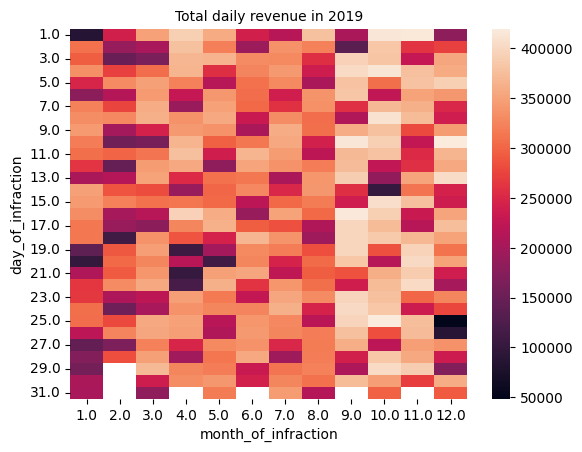

In [150]:
ax = sns.heatmap(daily_rev_2019)
ax.set_title("Total daily revenue in 2019", fontsize = 10)

Text(0.5, 1.0, 'Total daily revenue in 2020')

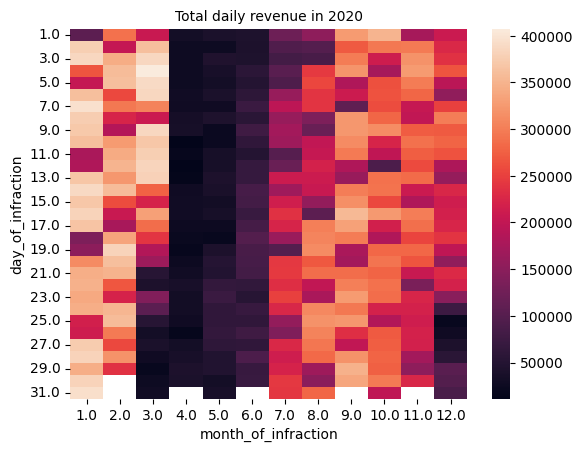

In [157]:
ax = sns.heatmap(daily_rev_2020)
ax.set_title("Total daily revenue in 2020", fontsize = 10)

Text(0.5, 1.0, 'Total daily revenue in 2021')

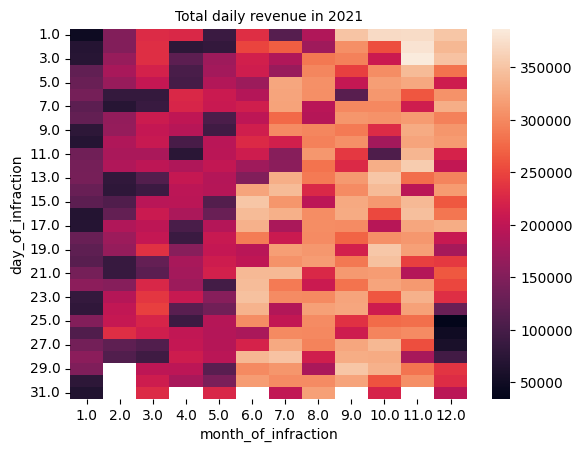

In [159]:
ax = sns.heatmap(daily_rev_2021)
ax.set_title("Total daily revenue in 2021", fontsize = 10)

In [89]:
# total number of infractions over time (daily)

a = parking_df.groupby("date_of_infraction_dt")["infraction_code"].agg("count")

a.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='date_of_infraction_dt', length=4725, freq=None)

In [90]:
a

date_of_infraction_dt
2009-01-01     649
2009-01-02    7595
2009-01-03    6377
2009-01-04    5968
2009-01-05    8288
              ... 
2022-12-27    2212
2022-12-28    4563
2022-12-29    4589
2022-12-30    4769
2022-12-31    2950
Name: infraction_code, Length: 4725, dtype: int64

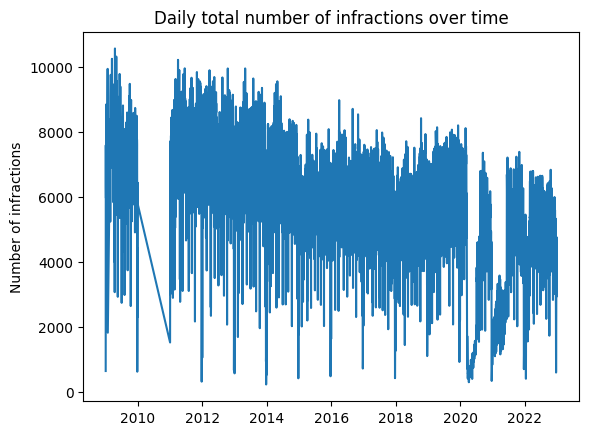

In [105]:
plt.plot(a.index, a)
plt.title("Daily total number of infractions over time")
plt.ylabel("Number of infractions")
plt.show()

In [122]:
# monthly number of infractions over time

monthly_infractions = parking_df.groupby(["year_of_infraction", "month_of_infraction"])["infraction_code"].agg("count").reset_index()

monthly_infractions["year_of_infraction"] = monthly_infractions["year_of_infraction"].astype(int).astype(str)
monthly_infractions["month_of_infraction"] = monthly_infractions["month_of_infraction"].astype(int).map(lambda x: f"{x:0>2}")

monthly_infractions["year_month_dt"] = monthly_infractions["month_of_infraction"] + monthly_rev["year_of_infraction"]
monthly_infractions["year_month_dt"] = pd.to_datetime(monthly_infractions["year_month_dt"], format = "%m%Y")

monthly_infractions

,year_of_infraction,month_of_infraction,infraction_code,year_month_dt
0,2009,01,170862,2009-01-01
1,2009,02,92101,2009-02-01
2,2009,03,268743,2009-03-01
3,2009,04,241657,2009-04-01
4,2009,05,245505,2009-05-01
...,...,...,...,...
151,2022,08,162862,2022-08-01
152,2022,09,159432,2022-09-01
153,2022,10,165293,2022-10-01
154,2022,11,153956,2022-11-01


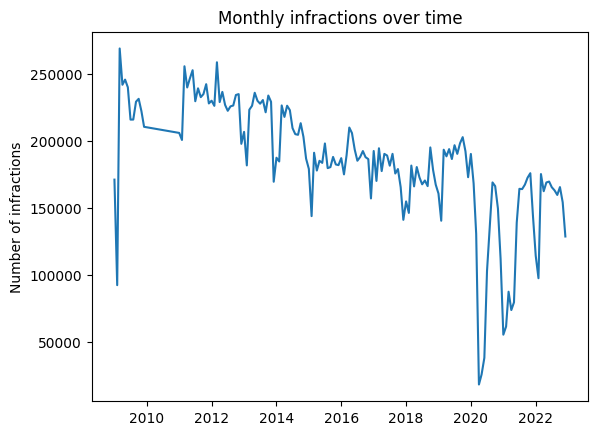

In [127]:
plt.plot(monthly_infractions["year_month_dt"], monthly_infractions["infraction_code"])
plt.ylabel("Number of infractions")
plt.title("Monthly infractions over time")
plt.show()

In [97]:
# total revenue over time (daily)

rev = parking_df.groupby("date_of_infraction_dt")["set_fine_amount"].agg("sum")

rev.index

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='date_of_infraction_dt', length=4725, freq=None)

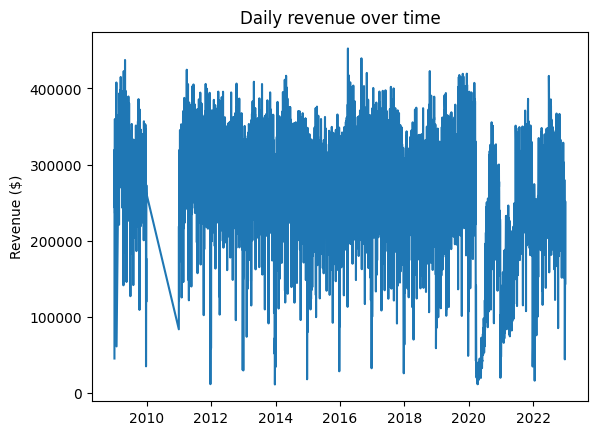

In [106]:
plt.plot(rev.index, rev)

plt.title("Daily revenue over time")
plt.ylabel("Revenue (\$)")

plt.show()

In [116]:
# monthly revenue over time

monthly_rev = parking_df.groupby(["year_of_infraction", "month_of_infraction"])["set_fine_amount"].agg("sum").reset_index()
monthly_rev["year_of_infraction"] = monthly_rev["year_of_infraction"].astype(int).astype(str)
monthly_rev["month_of_infraction"] = monthly_rev["month_of_infraction"].astype(int).map(lambda x: f"{x:0>2}")

monthly_rev["year_month_dt"] = monthly_rev["month_of_infraction"] + monthly_rev["year_of_infraction"]
monthly_rev["year_month_dt"] = pd.to_datetime(monthly_rev["year_month_dt"], format = "%m%Y")
monthly_rev

,year_of_infraction,month_of_infraction,set_fine_amount,year_month_dt
0,2009,01,7174075.0,2009-01-01
1,2009,02,3826005.0,2009-02-01
2,2009,03,10980275.0,2009-03-01
3,2009,04,10006635.0,2009-04-01
4,2009,05,10083555.0,2009-05-01
...,...,...,...,...
151,2022,08,8962895.0,2022-08-01
152,2022,09,8665985.0,2022-09-01
153,2022,10,8750600.0,2022-10-01
154,2022,11,8117640.0,2022-11-01


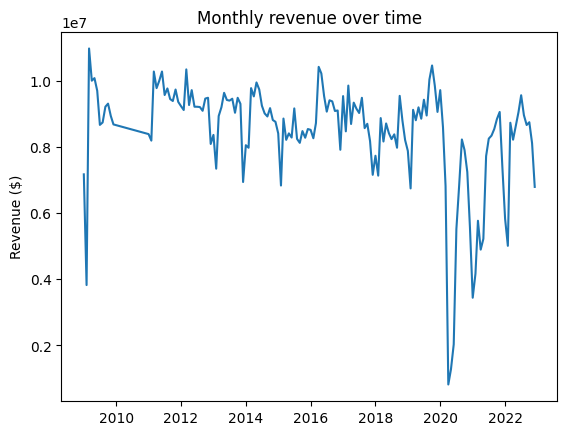

In [120]:
plt.plot(monthly_rev["year_month_dt"], monthly_rev["set_fine_amount"])
plt.ylabel("Revenue (\$)")
plt.title("Monthly revenue over time")
plt.show()

In [144]:
# count of infraction types

infraction_type_count = parking_df.groupby("infraction_description")["infraction_code"].agg("count")
infraction_type_count = infraction_type_count[infraction_type_count > 100000]
infraction_type_count.sort_values(ascending = False)

infraction_description
PARK PROHIBITED TIME NO PERMIT    4286157
PARK ON PRIVATE PROPERTY          3015106
PARK-SIGNED HWY-PROHIBIT DY/TM    2914986
PARK FAIL TO DISPLAY RECEIPT      2117131
PARK MACHINE-REQD FEE NOT PAID    1657438
PARK/LEAVE ON PRIVATE PROPERTY    1543067
PARK HWY PROHIBED TIME/DAY        1478838
PARK FAIL TO DEP. FEE MACHINE     1091743
STOP-SIGNED HWY-PROHIBIT TM/DY     901881
STAND VEH.-PROHIBIT TIME/DAY       621193
PARK - LONGER THAN 3 HOURS         613698
PARK-VEH. W/O VALID ONT PLATE      520365
PARK-SIGNED HWY-EXC PERMT TIME     503101
STOP-SIGNED HIGHWAY-RUSH HOUR      479195
STOP HWY PROHIBITED TIME/DAY       419992
PARK-HWY DRNG PROH TIMES/DAYS      403823
PARK - LONGER THAN 3 HOURS         331021
PARK LONGER THAN 3 HOURS           320866
PARK HWY IN EXCESS PRMTD TIME      301359
STD VEH HWY PROHIB TIME/DAY        271489
PARK-WITHIN 3M OF FIRE HYDRANT     260193
STAND SIGNED TRANSIT STOP          255184
STOP-HWY-PROHIBITED TIMES/DAYS     252393
PARK IN A F

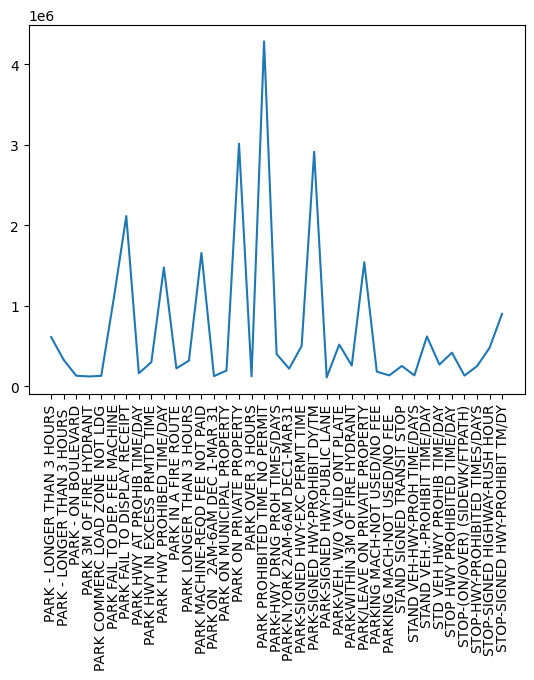

In [145]:
plt.plot(infraction_type_count)
plt.xticks(rotation = 90)
plt.show()

In [238]:
# count of infractions per location

infraction_count_loc = parking_df.groupby("location2")["infraction_code"].agg("count")
infraction_count_loc = infraction_count_loc[infraction_count_loc > 1000]
infraction_count_loc.sort_values(ascending = False)[:15]

location2
2075 BAYVIEW AVE        69000
20 EDWARD ST            58990
1750 FINCH AVE E        35616
4700 KEELE ST           34963
JAMES ST                34479
2075 BAYVIEW AV         29517
15 MARINE PARADE DR     29186
LA PLANTE AVE           28444
1 BRIMLEY RD S          27256
1265 MILITARY TRL       26189
4001 LESLIE ST          23832
2 COOPER ST             22906
40 ORCHARD VIEW BLVD    22885
103 THE QUEENSWAY       22664
EDWARD ST               22300
Name: infraction_code, dtype: int64

In [174]:
# revenue per location, select specific locations

revenue_loc = parking_df.groupby(["year_of_infraction", "month_of_infraction"]).agg({"set_fine_amount": "sum", "infraction_code": "count"}).reset_index()
revenue_loc["year_of_infraction"] = revenue_loc["year_of_infraction"].astype(int).astype(str)
revenue_loc["month_of_infraction"] = revenue_loc["month_of_infraction"].astype(int).map(lambda x: f"{x:0>2}")

revenue_loc["year_month_dt"] = revenue_loc["month_of_infraction"] + revenue_loc["year_of_infraction"]
revenue_loc["year_month_dt"] = pd.to_datetime(revenue_loc["year_month_dt"], format = "%m%Y")
revenue_loc

,year_of_infraction,month_of_infraction,set_fine_amount,infraction_code,year_month_dt
0,2009,01,7174075.0,170862,2009-01-01
1,2009,02,3826005.0,92101,2009-02-01
2,2009,03,10980275.0,268743,2009-03-01
3,2009,04,10006635.0,241657,2009-04-01
4,2009,05,10083555.0,245505,2009-05-01
...,...,...,...,...,...
151,2022,08,8962895.0,162862,2022-08-01
152,2022,09,8665985.0,159432,2022-09-01
153,2022,10,8750600.0,165293,2022-10-01
154,2022,11,8117640.0,153956,2022-11-01


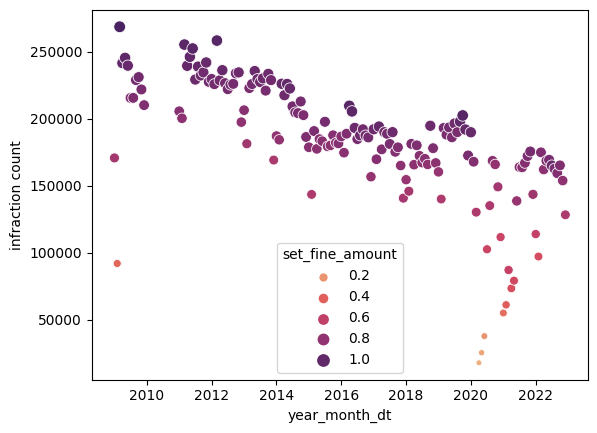

In [189]:
sns.scatterplot(data = revenue_loc, x = "year_month_dt", y = "infraction_code", 
                hue = "set_fine_amount", size = "set_fine_amount", palette = "flare")

plt.ylabel("infraction count")
plt.show()

In [292]:
# infraction count and revenue at the location with the highest count of infractions (2075 Bayview AveM)

revenue_bayview = parking_df[parking_df["location2"] == "2075 BAYVIEW AVE"]

revenue_bayview = parking_df.groupby(["year_of_infraction", "month_of_infraction"]).agg({"set_fine_amount": "sum", "infraction_code": "count"}).reset_index()
revenue_bayview["year_of_infraction"] = revenue_bayview["year_of_infraction"].astype(int).astype(str)
revenue_bayview["month_of_infraction"] = revenue_bayview["month_of_infraction"].astype(int).map(lambda x: f"{x:0>2}")

revenue_bayview["year_month_dt"] = revenue_bayview["month_of_infraction"] + revenue_loc["year_of_infraction"]
revenue_bayview["year_month_dt"] = pd.to_datetime(revenue_bayview["year_month_dt"], format = "%m%Y")
revenue_bayview

revenue_bayview

,year_of_infraction,month_of_infraction,set_fine_amount,infraction_code,year_month_dt
0,2009,01,7174075.0,170862,2009-01-01
1,2009,02,3826005.0,92101,2009-02-01
2,2009,03,10980275.0,268743,2009-03-01
3,2009,04,10006635.0,241657,2009-04-01
4,2009,05,10083555.0,245505,2009-05-01
...,...,...,...,...,...
151,2022,08,8962895.0,162862,2022-08-01
152,2022,09,8665985.0,159432,2022-09-01
153,2022,10,8750600.0,165293,2022-10-01
154,2022,11,8117640.0,153956,2022-11-01


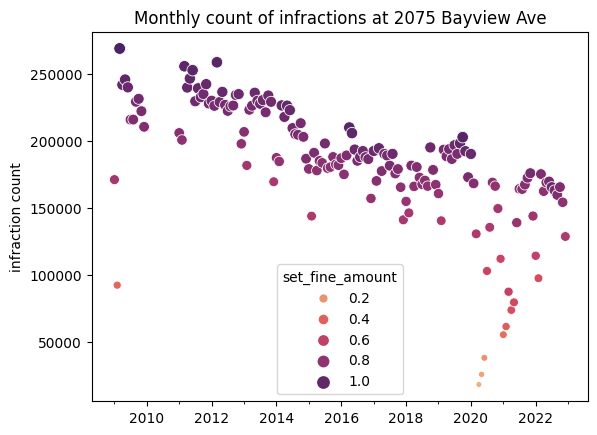

In [301]:
ax = sns.scatterplot(data = revenue_bayview, x = "year_month_dt", y = "infraction_code", 
                hue = "set_fine_amount", size = "set_fine_amount", palette = "flare")

plt.ylabel("infraction count")
plt.xlabel("")

fmt_year = mdates.YearLocator()
ax.xaxis.set_minor_locator(fmt_year)

plt.title("Monthly count of infractions at 2075 Bayview Ave")
plt.show()

In [222]:
# infractions/revenue for days in a week over all the years

dayofweek_revenue = parking_df.groupby("day_name_infraction").agg({"set_fine_amount": "sum", "infraction_code": "count"}).reset_index()
dayofweek_revenue["day_number"] = [4, 0, 5, 6, 3, 1, 2]
dayofweek_revenue = dayofweek_revenue.sort_values(by = ["day_number"])
dayofweek_revenue

,day_name_infraction,set_fine_amount,infraction_code,day_number
1,Monday,186467715.0,3974652,0
5,Tuesday,210927965.0,4530540,1
6,Wednesday,209639985.0,4517514,2
4,Thursday,208690255.0,4492383,3
0,Friday,210209195.0,4484154,4
2,Saturday,163247830.0,3799227,5
3,Sunday,130380870.0,2966661,6


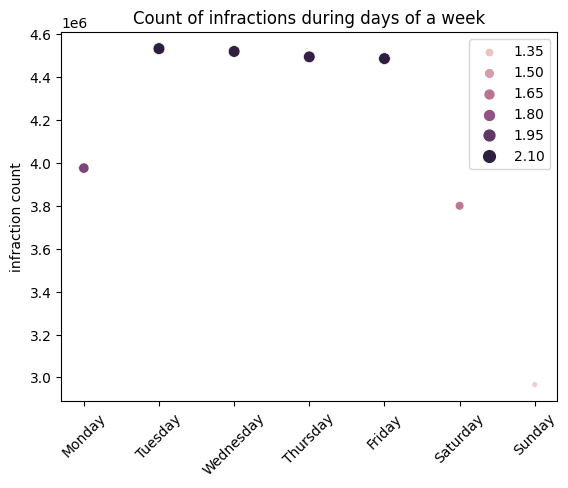

In [303]:
sns.scatterplot(data = dayofweek_revenue, x = "day_name_infraction", y = "infraction_code", 
                hue = "set_fine_amount", size = "set_fine_amount")

plt.xticks(rotation = 45)
plt.ylabel("infraction count")
plt.xlabel("")
plt.title("Count of infractions during days of a week")
plt.legend(loc = "best")
plt.show()

In [290]:
# infractions/revenue for hours in a day over all the years (2008 - 2022)
timeofday_revenue = parking_df.groupby("time_of_infraction_dt").agg({"set_fine_amount": "sum", "infraction_code": "count"}).reset_index()
timeofday_revenue


,time_of_infraction_dt,set_fine_amount,infraction_code
0,1900-01-01 00:00:00,320820.0,6336
1,1900-01-01 00:01:00,448215.0,10629
2,1900-01-01 00:02:00,509560.0,12815
3,1900-01-01 00:03:00,559570.0,14380
4,1900-01-01 00:04:00,623315.0,16455
...,...,...,...
1435,1900-01-01 23:55:00,374970.0,7867
1436,1900-01-01 23:56:00,348115.0,7097
1437,1900-01-01 23:57:00,330385.0,6703
1438,1900-01-01 23:58:00,334720.0,6789


In [226]:
import matplotlib.dates as md

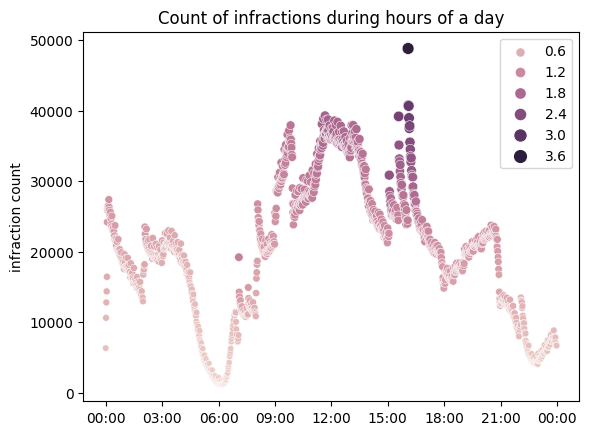

In [291]:
sns.scatterplot(data = timeofday_revenue, x = "time_of_infraction_dt", y = "infraction_code", 
                hue = "set_fine_amount", size = "set_fine_amount")

plt.ylabel("infraction count")
plt.xlabel("")
plt.title("Count of infractions during hours of a day")
plt.legend(loc = "best")
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

plt.show()

In [251]:
# infractions/revenue for hours in a day over all the years (2008 - 2022)
# at three different locations, a hospital, a university, and downtown Toronto
# ["2075 BAYVIEW AVE", "4700 KEELE ST", "20 EDWARD ST"]

timeofday_revenue_bayview = parking_df[parking_df["location2"] == "2075 BAYVIEW AVE"]
timeofday_revenue_keele = parking_df[parking_df["location2"] == "4700 KEELE ST"]
timeofday_revenue_edward = parking_df[parking_df["location2"] == "20 EDWARD ST"]


In [252]:
timeofday_revenue_bayview = timeofday_revenue_bayview.groupby("time_of_infraction_dt").agg({"set_fine_amount": "sum", "infraction_code": "count"}).reset_index()
timeofday_revenue_keele = timeofday_revenue_keele.groupby("time_of_infraction_dt").agg({"set_fine_amount": "sum", "infraction_code": "count"}).reset_index()
timeofday_revenue_edward = timeofday_revenue_edward.groupby("time_of_infraction_dt").agg({"set_fine_amount": "sum", "infraction_code": "count"}).reset_index()


In [253]:
timeofday_revenue_bayview

,time_of_infraction_dt,set_fine_amount,infraction_code
0,1900-01-01 00:00:00,60.0,2
1,1900-01-01 00:01:00,210.0,7
2,1900-01-01 00:02:00,30.0,1
3,1900-01-01 00:03:00,30.0,1
4,1900-01-01 00:05:00,240.0,8
...,...,...,...
1251,1900-01-01 23:54:00,60.0,2
1252,1900-01-01 23:55:00,180.0,6
1253,1900-01-01 23:56:00,60.0,2
1254,1900-01-01 23:57:00,150.0,5


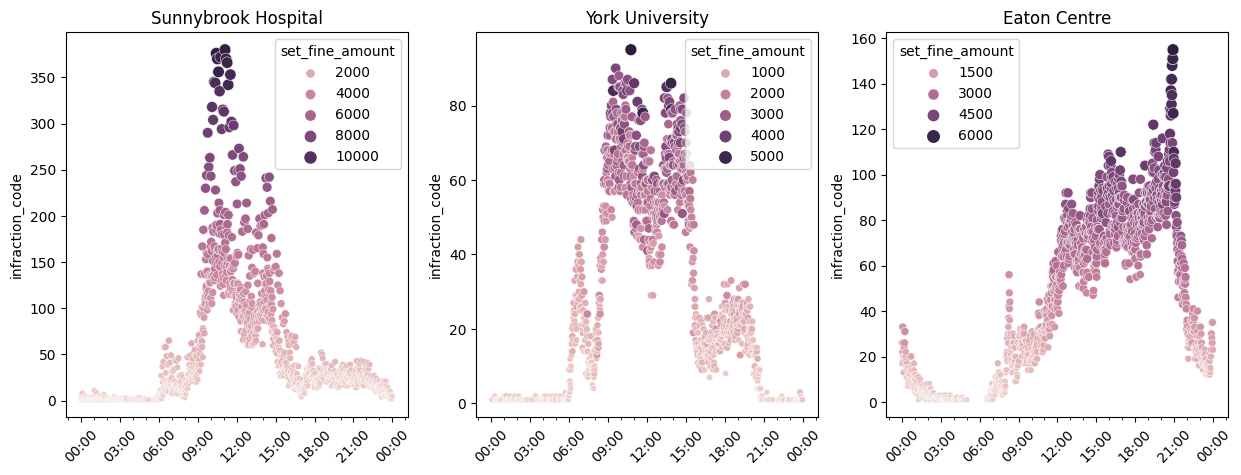

In [315]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axes[0], data = timeofday_revenue_bayview, x = "time_of_infraction_dt", y = "infraction_code", 
            hue = "set_fine_amount", size = "set_fine_amount")
axes[0].set_title("Sunnybrook Hospital")
axes[0].xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
fmt_hour = mdates.HourLocator()
axes[0].xaxis.set_minor_locator(fmt_hour)
axes[0].tick_params(axis = "x", which='major', labelrotation = 45)
axes[0].set_xlabel("")

sns.scatterplot(ax = axes[1], data = timeofday_revenue_keele, x = "time_of_infraction_dt", y = "infraction_code", 
            hue = "set_fine_amount", size = "set_fine_amount")
axes[1].set_title("York University")
axes[1].xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
axes[1].xaxis.set_minor_locator(fmt_hour)
axes[1].tick_params(axis = "x", which='major', labelrotation = 45)
axes[1].set_xlabel("")

sns.scatterplot(ax = axes[2], data = timeofday_revenue_edward, x = "time_of_infraction_dt", y = "infraction_code", 
            hue = "set_fine_amount", size = "set_fine_amount")
axes[2].set_title("Eaton Centre")
axes[2].xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
axes[2].xaxis.set_minor_locator(fmt_hour)
axes[2].tick_params(axis = "x", which='major', labelrotation = 45)
axes[2].set_xlabel("")


plt.show()

In [309]:
# revenue eaton centre heatmap (time of day vs day of the week vs revenue)

revenue_timeofday_dayofweek_eaton = parking_df[parking_df["location2"] == "20 EDWARD ST"]

In [ ]:
# pivot(index = "day_of_infraction", columns = "month_of_infraction", values = "set_fine_amount")

In [310]:
revenue_timeofday_dayofweek_eaton = revenue_timeofday_dayofweek_eaton.groupby(["time_of_infraction_dt", "day_name_infraction"])["set_fine_amount"].agg("sum").reset_index().pivot(index = "time_of_infraction_dt", columns = "day_name_infraction", values = "set_fine_amount")
revenue_timeofday_dayofweek_eaton

day_name_infraction,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
time_of_infraction_dt,,,,,,,
1900-01-01 00:00:00,130.0,150.0,210.0,290.0,130.0,NaN,270.0
1900-01-01 00:01:00,40.0,50.0,430.0,360.0,180.0,NaN,190.0
1900-01-01 00:02:00,40.0,40.0,230.0,170.0,80.0,NaN,260.0
1900-01-01 00:03:00,140.0,80.0,230.0,440.0,NaN,130.0,340.0
1900-01-01 00:04:00,140.0,90.0,530.0,390.0,100.0,100.0,370.0
...,...,...,...,...,...,...,...
1900-01-01 23:55:00,520.0,280.0,140.0,190.0,40.0,220.0,170.0
1900-01-01 23:56:00,460.0,100.0,350.0,150.0,130.0,190.0,300.0
1900-01-01 23:57:00,360.0,90.0,130.0,250.0,90.0,210.0,180.0


Text(0.5, 1.0, 'title')

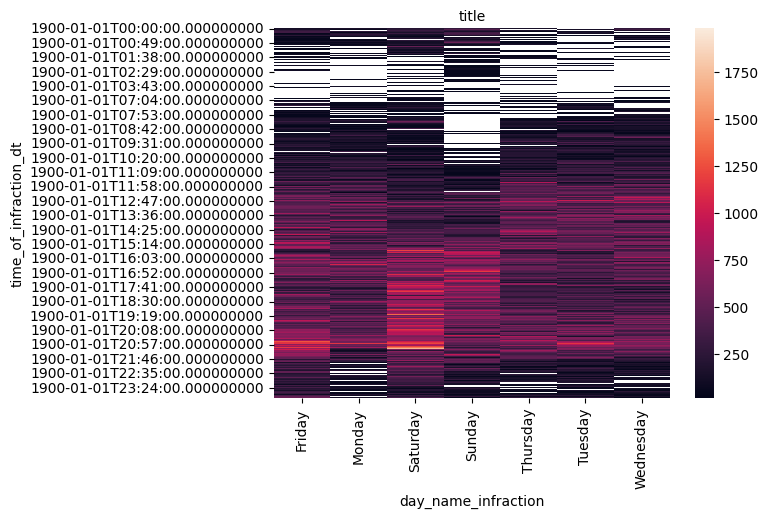

In [311]:
ax = sns.heatmap(revenue_timeofday_dayofweek_eaton)
ax.set_title("title", fontsize = 10)